Loading and cleaning data...
Performing monthly trend analysis...


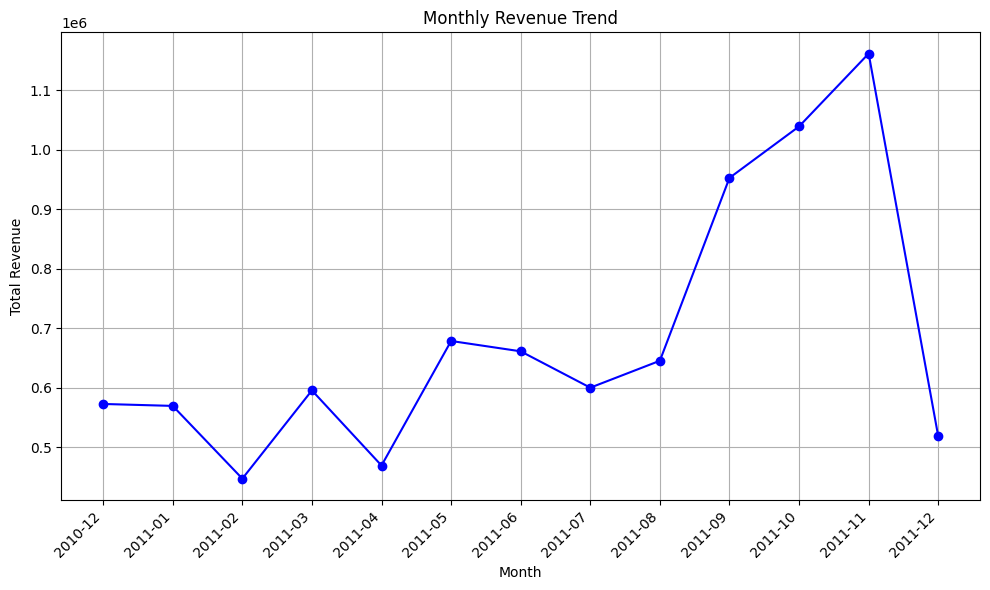


Monthly Sales Summary:
     Month  TotalPrice
0  2010-12  572713.890
1  2011-01  569445.040
2  2011-02  447137.350
3  2011-03  595500.760
4  2011-04  469200.361
Calculating RFM metrics...
Visualizing customer segments...


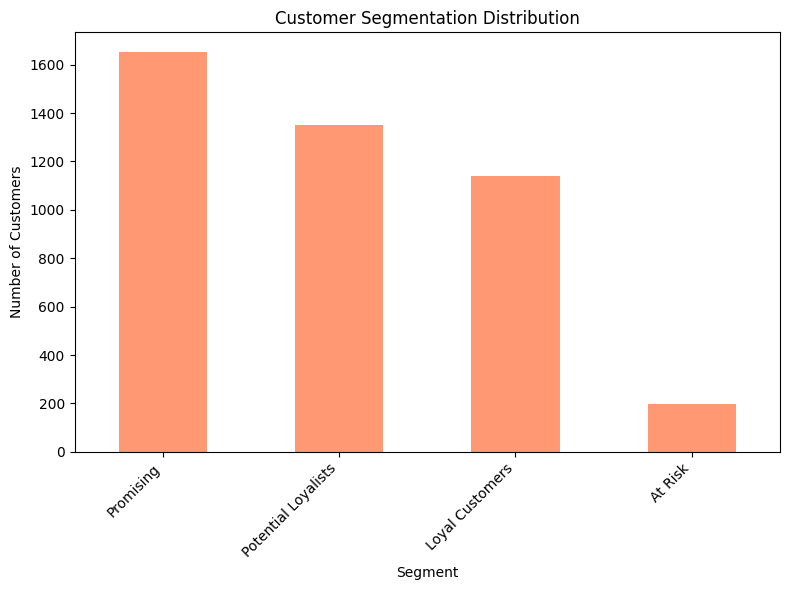

Analyzing loyal customer product preferences...


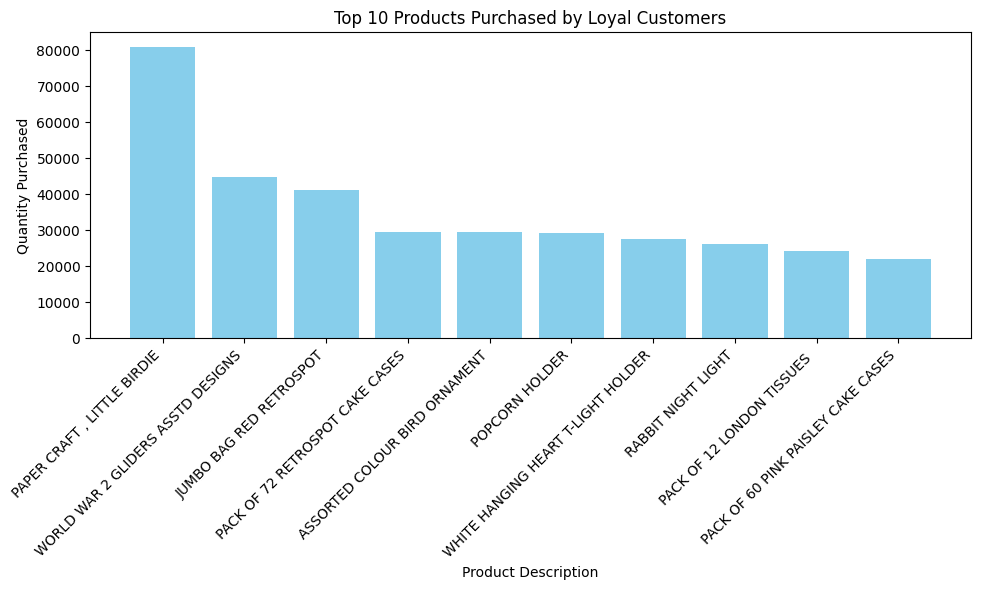


Top Products for Loyal Customers:
                          Description  Quantity
0         PAPER CRAFT , LITTLE BIRDIE     80995
1   WORLD WAR 2 GLIDERS ASSTD DESIGNS     44954
2             JUMBO BAG RED RETROSPOT     41199
3     PACK OF 72 RETROSPOT CAKE CASES     29592
4       ASSORTED COLOUR BIRD ORNAMENT     29520
5                      POPCORN HOLDER     29368
6  WHITE HANGING HEART T-LIGHT HOLDER     27744
7                  RABBIT NIGHT LIGHT     26331
8          PACK OF 12 LONDON TISSUES      24155
9  PACK OF 60 PINK PAISLEY CAKE CASES     22016
Performing regional sales analysis...


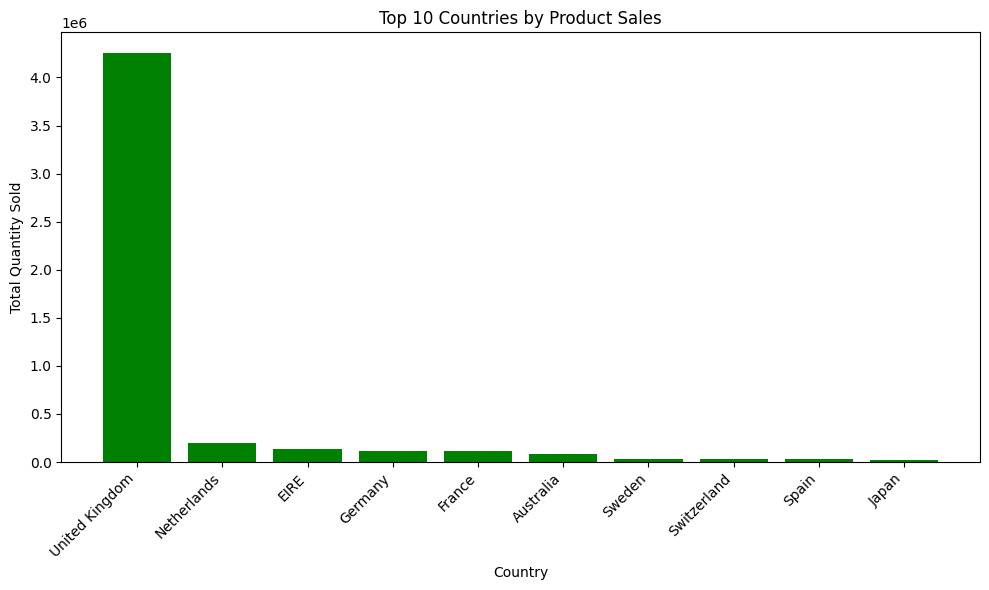


Regional Sales (Top 10 Countries):
          Country  Quantity
0  United Kingdom   4256740
1     Netherlands    200361
2            EIRE    140275
3         Germany    119261
4          France    111471
5       Australia     83901
6          Sweden     36083
7     Switzerland     30082
8           Spain     27940
9           Japan     26016
Analyzing loyal customer percentages by country...


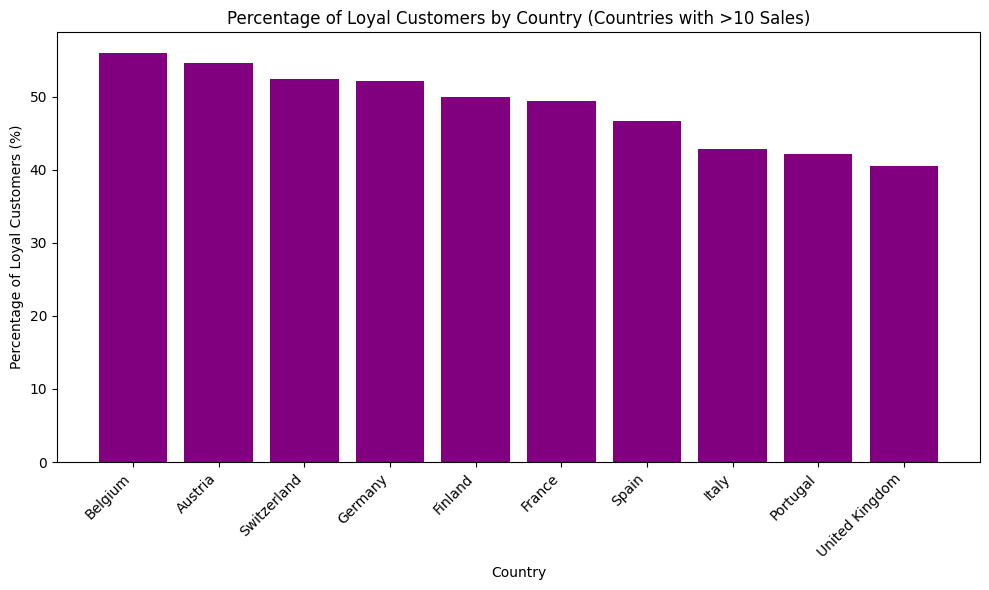


Loyal Customer Analysis by Country (Countries with >10 Sales):
          Country  Total_Customers  Loyal_Customers  Loyal_Percentage
0         Belgium               25               14         56.000000
1         Austria               11                6         54.545455
2     Switzerland               21               11         52.380952
3         Germany               94               49         52.127660
4         Finland               12                6         50.000000
5          France               87               43         49.425287
6           Spain               30               14         46.666667
7           Italy               14                6         42.857143
8        Portugal               19                8         42.105263
9  United Kingdom             3920             1589         40.535714


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Load and Clean Data
def load_and_prepare_data(url):

    data = pd.read_excel(url)

    data = data[data['Quantity'] > 0]
    data = data[data['UnitPrice'] > 0]
    data.dropna(subset=['CustomerID'], inplace=True)
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
    data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
    return data

# Step 2: Monthly Trend Analysis

def monthly_trend_analysis(data):

    data['Month'] = data['InvoiceDate'].dt.to_period('M')

    monthly_sales = data.groupby('Month').agg({'TotalPrice': 'sum'}).reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sales['Month'].astype(str), monthly_sales['TotalPrice'], marker='o', color='blue')
    plt.title('Monthly Revenue Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45, ha='right')
    plt.grid()
    plt.tight_layout()
    plt.show()

    return monthly_sales

# Step 3: Calculate RFM Metrics

def calculate_rfm(data):
    current_date = data['InvoiceDate'].max()
    rfm = data.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
        'InvoiceNo': 'count',  # Frequency
        'TotalPrice': 'sum'  # Monetary
    }).reset_index()
    rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']  # Rename columns
    return rfm

# Step 4: RFM Scoring Functions

def calculate_r_score(rfm):
    rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
    return rfm

def calculate_f_score(rfm):
    rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=[0, 1, 3, 6, rfm['Frequency'].max()],
                            labels=[1, 2, 3, 4], include_lowest=True)
    return rfm

def calculate_m_score(rfm):
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
    return rfm

def calculate_rfm_score(rfm):
    rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
    return rfm

def assign_segments(rfm):
    def segment_customer(row):
        if row['RFM_Score'] >= 11:
            return 'Loyal Customers'
        elif row['RFM_Score'] >= 9:
            return 'Potential Loyalists'
        elif row['RFM_Score'] >= 6:
            return 'Promising'
        else:
            return 'At Risk'
    rfm['Segment'] = rfm.apply(segment_customer, axis=1)
    return rfm

# Step 5: Visualize Customer Segments

def visualize_customer_segments(rfm):
    segment_counts = rfm['Segment'].value_counts()

    plt.figure(figsize=(8, 6))
    segment_counts.plot(kind='bar', color='coral', alpha=0.8)
    plt.title('Customer Segmentation Distribution')
    plt.xlabel('Segment')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Step 6: Loyal Customer Product Analysis

def loyal_customer_products(data, rfm):
    loyal_customers = rfm[rfm['RFM_Score'] >= 10]
    loyal_customer_ids = loyal_customers['CustomerID']
    loyal_customer_data = data[data['CustomerID'].isin(loyal_customer_ids)]
    products = loyal_customer_data.groupby('Description').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False).reset_index()

    top_products = products.head(10)


    plt.figure(figsize=(10, 6))
    plt.bar(top_products['Description'], top_products['Quantity'], color='skyblue')
    plt.title('Top 10 Products Purchased by Loyal Customers')
    plt.xlabel('Product Description')
    plt.ylabel('Quantity Purchased')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return top_products

# Step 7: Regional Sales Analysis

def regional_sales_analysis(data):

    country_sales = data.groupby('Country').agg({
        'Quantity': 'sum'
    }).sort_values(by='Quantity', ascending=False).reset_index()


    top_countries = country_sales.head(10)

    plt.figure(figsize=(10, 6))
    plt.bar(top_countries['Country'], top_countries['Quantity'], color='green')
    plt.title('Top 10 Countries by Product Sales')
    plt.xlabel('Country')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return country_sales

# Step 8: Loyal Customer Percentage by Country

def loyal_customer_percentage_by_country(data, rfm):

    customer_country_data = data[['CustomerID', 'Country']].drop_duplicates()
    rfm_with_country = pd.merge(rfm, customer_country_data, on='CustomerID', how='left')

    country_totals = rfm_with_country.groupby('Country').agg({
        'CustomerID': 'count'
    }).rename(columns={'CustomerID': 'Total_Customers'})

    country_loyals = rfm_with_country[rfm_with_country['RFM_Score'] >= 10].groupby('Country').agg({
        'CustomerID': 'count'
    }).rename(columns={'CustomerID': 'Loyal_Customers'})

    country_analysis = pd.merge(country_totals, country_loyals, on='Country', how='inner')
    country_analysis['Loyal_Percentage'] = (country_analysis['Loyal_Customers'] / country_analysis['Total_Customers']) * 100

    # Filter for countries with more than 10 total sales
    country_analysis = country_analysis[country_analysis['Total_Customers'] > 10]

    country_analysis = country_analysis.sort_values(by='Loyal_Percentage', ascending=False).reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(country_analysis['Country'], country_analysis['Loyal_Percentage'], color='purple')
    plt.title('Percentage of Loyal Customers by Country (Countries with >10 Sales)')
    plt.xlabel('Country')
    plt.ylabel('Percentage of Loyal Customers (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return country_analysis

# Step 9: Execute the Pipeline

if __name__ == "__main__":
    # Dataset URL
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

    # Load and prepare data
    print("Loading and cleaning data...")
    data = load_and_prepare_data(url)

    # Perform monthly trend analysis
    print("Performing monthly trend analysis...")
    monthly_sales = monthly_trend_analysis(data)
    print("\nMonthly Sales Summary:")
    print(monthly_sales.head())

    # Calculate RFM metrics
    print("Calculating RFM metrics...")
    rfm = calculate_rfm(data)
    rfm = calculate_r_score(rfm)
    rfm = calculate_f_score(rfm)
    rfm = calculate_m_score(rfm)
    rfm = calculate_rfm_score(rfm)
    rfm = assign_segments(rfm)

    # Visualize customer segments
    print("Visualizing customer segments...")
    visualize_customer_segments(rfm)

    # Analyze loyal customer products
    print("Analyzing loyal customer product preferences...")
    top_loyal_products = loyal_customer_products(data, rfm)
    print("\nTop Products for Loyal Customers:")
    print(top_loyal_products)

    # Perform regional sales analysis
    print("Performing regional sales analysis...")
    country_sales = regional_sales_analysis(data)
    print("\nRegional Sales (Top 10 Countries):")
    print(country_sales.head(10))

    # Perform loyal customer percentage analysis by country
    print("Analyzing loyal customer percentages by country...")
    country_loyal_analysis = loyal_customer_percentage_by_country(data, rfm)
    print("\nLoyal Customer Analysis by Country (Countries with >10 Sales):")
    print(country_loyal_analysis)



Regression Model Performance:
Mean Squared Error (MSE): 89188.66495069723
R² Score: -0.03611743421695435

Predictions for new data:
[512.42963993 498.69605655]


<ipython-input-6-036ed6629b55>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")


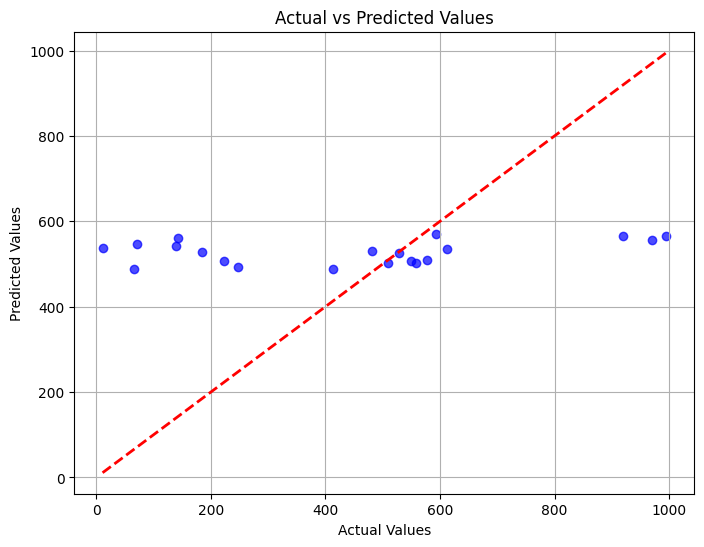

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = rfm[['Recency', 'Frequency']]
y = rfm['Monetary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


new_data = pd.DataFrame({'Recency': [10, 30], 'Frequency': [5, 2]})
predictions = reg_model.predict(new_data)
print("\nPredictions for new data:")
print(predictions)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()



Model Performansı:
Accuracy: 0.9953917050691244

Confusion Matrix:
 [[ 48   0   0   1]
 [  0 343   1   0]
 [  0   0 415   0]
 [  2   0   2 490]]

Classification Report:
                      precision    recall  f1-score   support

            At Risk       0.96      0.98      0.97        49
    Loyal Customers       1.00      1.00      1.00       344
Potential Loyalists       0.99      1.00      1.00       415
          Promising       1.00      0.99      0.99       494

           accuracy                           1.00      1302
          macro avg       0.99      0.99      0.99      1302
       weighted avg       1.00      1.00      1.00      1302


Özelliklerin Önemi:
     Feature  Importance
0    Recency    0.345971
1  Frequency    0.327469
2   Monetary    0.326561


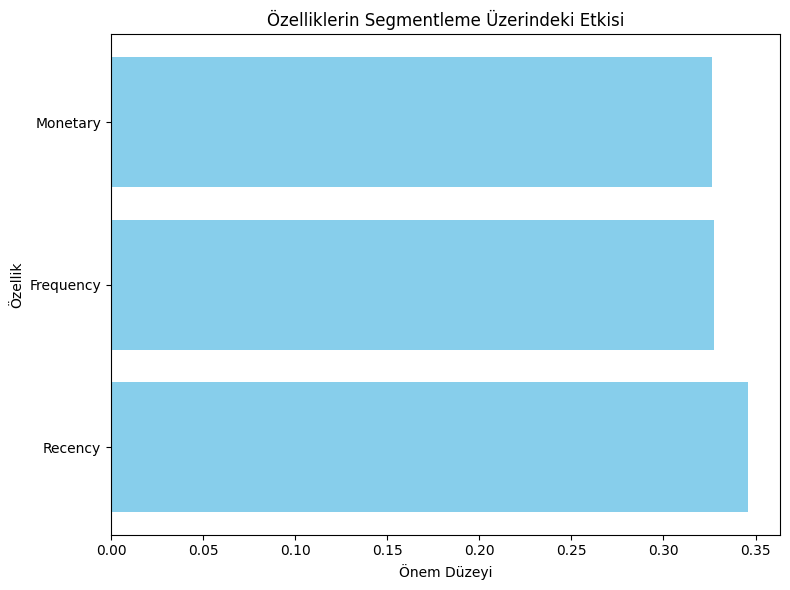

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Segment']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

print("\nModel Performansı:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nÖzelliklerin Önemi:")
print(feature_importances)

plt.figure(figsize=(8, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellik')
plt.title('Özelliklerin Segmentleme Üzerindeki Etkisi')
plt.tight_layout()
plt.show()


Mean Squared Error: 41461174343.26273
R2 Score: 0.30279567387165596
Predicted Revenue for Next Month: [687250.89431]


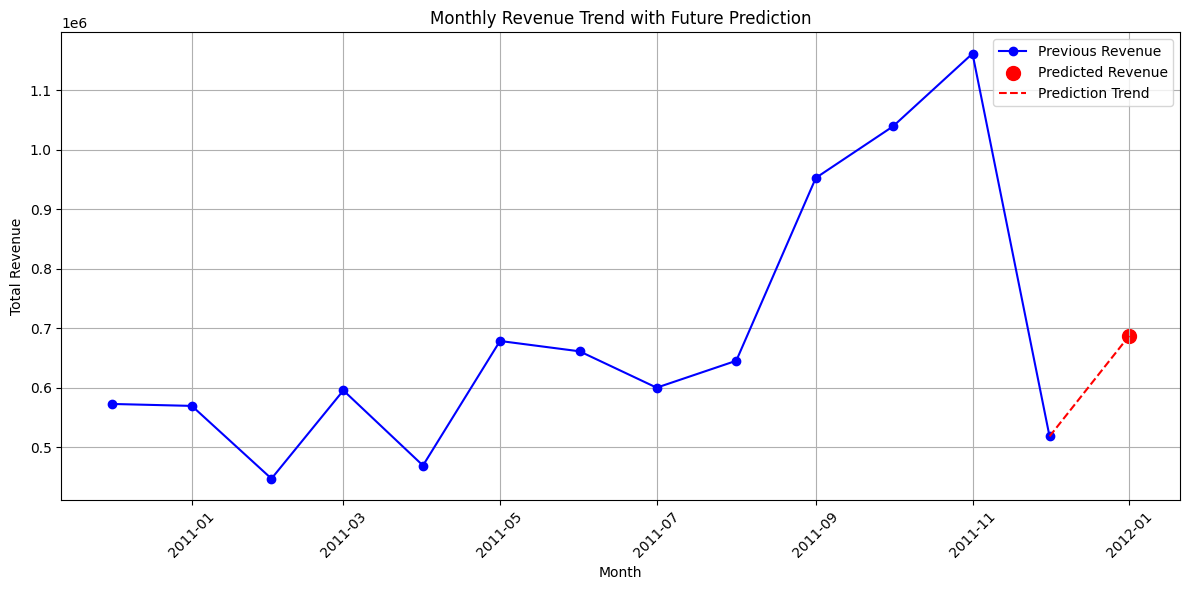

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

monthly_sales['Month'] = monthly_sales['Month'].astype(str)
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])
monthly_sales['Month_Number'] = monthly_sales['Month'].dt.month
X = monthly_sales[['Month_Number']].values
y = monthly_sales['TotalPrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

future_month = np.array([[13]])
future_revenue = model.predict(future_month)
print("Predicted Revenue for Next Month:", future_revenue)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['TotalPrice'], label='Previous Revenue', marker='o', color='blue')

future_month_label = monthly_sales['Month'].iloc[-1] + pd.DateOffset(months=1)
future_revenue_value = future_revenue[0]

plt.scatter(future_month_label, future_revenue_value, color='red', label='Predicted Revenue', s=100)
plt.plot([monthly_sales['Month'].iloc[-1], future_month_label],
         [monthly_sales['TotalPrice'].iloc[-1], future_revenue_value],
         linestyle='--', color='red', label='Prediction Trend')

plt.title('Monthly Revenue Trend with Future Prediction')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Loading and cleaning data...
Preparing monthly customer data...
Predicting next month's customer count...
Mean Squared Error: 105781.54
Predicted Customer Count for Next Month: 868
Visualizing customer predictions...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


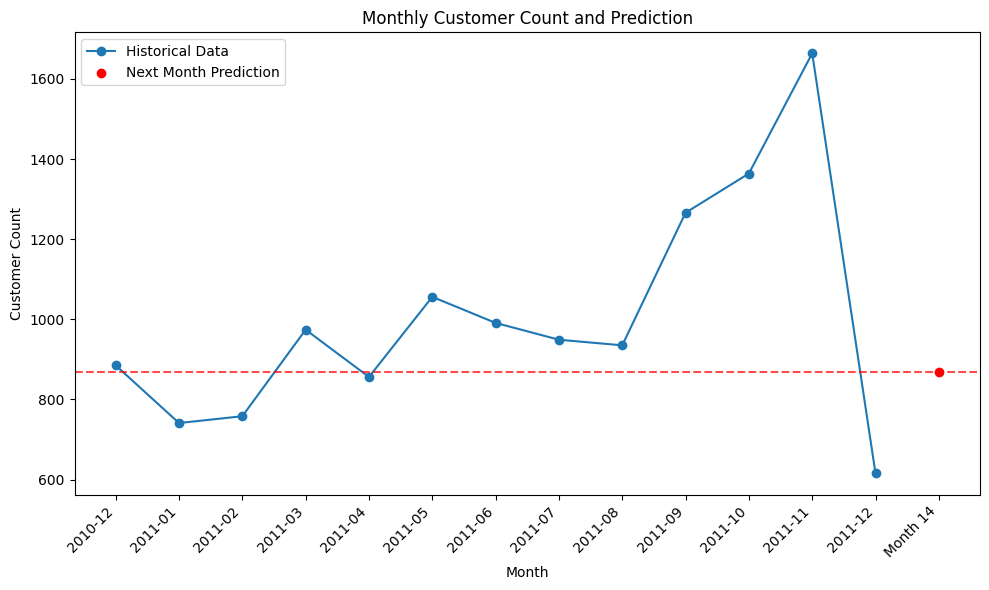

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare Monthly Customer Data

def prepare_monthly_customer_data(data):

    data['Month'] = data['InvoiceDate'].dt.to_period('M')
    monthly_customers = data.groupby('Month').agg({'CustomerID': 'nunique'}).reset_index()
    monthly_customers['Month'] = monthly_customers['Month'].astype(str)
    monthly_customers.rename(columns={'CustomerID': 'CustomerCount'}, inplace=True)
    return monthly_customers

# Step 2: Train a Model for Prediction

def predict_next_month_customers(monthly_customers):

    monthly_customers['MonthIndex'] = range(len(monthly_customers))
    X = monthly_customers[['MonthIndex']]
    y = monthly_customers['CustomerCount']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")

    next_month_index = [[len(monthly_customers)]]
    next_month_prediction = model.predict(next_month_index)[0]

    return next_month_prediction, model

# Step 3: Visualize Customer Count and Prediction

def visualize_customer_predictions(monthly_customers, next_month_prediction):

    plt.figure(figsize=(10, 6))
    plt.plot(monthly_customers['Month'], monthly_customers['CustomerCount'], marker='o', label='Historical Data')

    next_month = f"Month {len(monthly_customers) + 1}"
    plt.scatter(next_month, next_month_prediction, color='red', label='Next Month Prediction')
    plt.axhline(next_month_prediction, color='red', linestyle='--', alpha=0.7)

    plt.title('Monthly Customer Count and Prediction')
    plt.xlabel('Month')
    plt.ylabel('Customer Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Execute the pipeline

if __name__ == "__main__":
    # Dataset URL
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

    print("Loading and cleaning data...")
    data = load_and_prepare_data(url)

    print("Preparing monthly customer data...")
    monthly_customers = prepare_monthly_customer_data(data)

    print("Predicting next month's customer count...")
    next_month_prediction, model = predict_next_month_customers(monthly_customers)
    print(f"Predicted Customer Count for Next Month: {next_month_prediction:.0f}")

    print("Visualizing customer predictions...")
    visualize_customer_predictions(monthly_customers, next_month_prediction)
